In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('DEFUNCIONES_FUENTE_DEIS_2016_2021_22042021.csv',
                   sep = ';', encoding = 'latin-1')

In [4]:
data.columns = ['Año','Fecha','Sexo','Código_Edad','Edad','Código_Comuna','Comuna','Región','Código_Diagnóstico',
               'Capítulo_Diagnóstico','Diagnóstico1','Código_Grupo','Grupo_Diagnóstico','Código_Categoría',
               'Categoría_Diagnóstico','Código_Subcategoría','Subcategoría_Diagnóstico1','Diagnóstico2','Código_Capítulo2',
               'Capítulo_Diagnóstico2','Código_Grupo2','Grupo_Diagnóstico2','Código_Categoría2','Categoría_Diagnóstico2',
               'Código_Subcategoría2','Subcategoría2']
#Los datos venían con encabezados en archivo adj.

In [5]:
data = data.drop(['Código_Edad','Edad','Código_Comuna','Comuna','Código_Diagnóstico','Capítulo_Diagnóstico','Código_Grupo','Código_Categoría',
           'Código_Subcategoría','Diagnóstico2','Código_Capítulo2','Capítulo_Diagnóstico2', 'Código_Grupo2','Grupo_Diagnóstico2',
           'Código_Categoría2','Categoría_Diagnóstico2', 'Código_Subcategoría2','Subcategoría2'], axis =1)
#Se eliminan los datos que no utilizaremos.

In [6]:
data = data.dropna()

In [7]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [8]:
data.insert(1,'Semana', 0, allow_duplicates = True)

In [9]:
data['Semana'] = data['Fecha'].dt.week

<ipython-input-9-931269959ac9>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Semana'] = data['Fecha'].dt.week


In [10]:
data = data[data['Fecha'].dt.year == 2020]
#Se consideraró solo el 2020.

In [11]:
data.head()

,Año,Semana,Fecha,Sexo,Región,Diagnóstico1,Grupo_Diagnóstico,Categoría_Diagnóstico,Subcategoría_Diagnóstico1
41024,2020,46,2020-11-10,Hombre,Metropolitana de Santiago,Enfermedades del sistema circulatorio,Enfermedades isquémicas del corazón,Enfermedad isquémica crónica del corazón,ENFERMEDAD ISQUEMICA CRONICA DEL CORAZÓN NO ES...
41025,2020,30,2020-07-21,Hombre,Del Libertador B. O'Higgins,Enfermedades del sistema circulatorio,Enfermedades cerebrovasculares,Otras enfermedades cerebrovasculares,OTRAS ENFERMEDADES CEREBROVASCULARES ESPECIFIC...
41026,2020,7,2020-02-13,Hombre,De Valparaíso,Trastornos mentales y del comportamiento,"Trastornos mentales orgánicos, incluidos los t...","Demencia , no especificada",DEMENCIA NO ESPECIFICADA
41027,2020,5,2020-01-31,Mujer,Metropolitana de Santiago,Enfermedades del sistema respiratorio,Influenza [gripe] y neumonía,"Neumonía, organismo no especificado",NEUMONIA NO ESPECIFICADA
41028,2020,42,2020-10-13,Hombre,Del Maule,Códigos para propósitos especiales,Asignación provisoria de nuevas afecciones de ...,Uso emergente de U07,COVID-19 virus identificado


In [12]:
data.insert(8,'Fallecidos', 1, allow_duplicates = True)

**MUERTES POR GRIPE**

In [13]:
gripe = data[data.Subcategoría_Diagnóstico1.str.contains('NEUMONIA|BRONCONEUMONIA')]
#Se consideró como gripe la neumonía y bronconeumonía
#Se consideró como causa de muerte la sebcategoría del diagnóstico1

In [14]:
gripe = gripe.groupby (by =['Semana']).Fallecidos.count()
gripe = gripe.to_frame()

In [15]:
gripe

,Fallecidos
Semana,
1,76
2,82
3,89
4,83
5,91
6,82
7,76
8,89
9,74


**MUERTES POR COVID**

In [16]:
covid = data[data.Subcategoría_Diagnóstico1.str.contains('COVID')]

In [17]:
covid = covid.groupby (by =['Semana']).Fallecidos.count()
covid = covid.to_frame()

In [18]:
covid

,Fallecidos
Semana,
12,8
13,19
14,64
15,89
16,98
17,113
18,152
19,240
20,426


**MUERTES TOTALES**

In [19]:
totales = data.groupby (by =['Semana']).Fallecidos.count()
totales = totales.to_frame()

In [20]:
totales

,Fallecidos
Semana,
1,1536
2,2055
3,2057
4,1962
5,1970
6,1994
7,1909
8,1899
9,1884


**GRÁFICA COMPARATIVA COVID VS TOTALES**

Text(0.5, 1.0, 'Gráfica Comparativa COVID VS Muertes Totales')

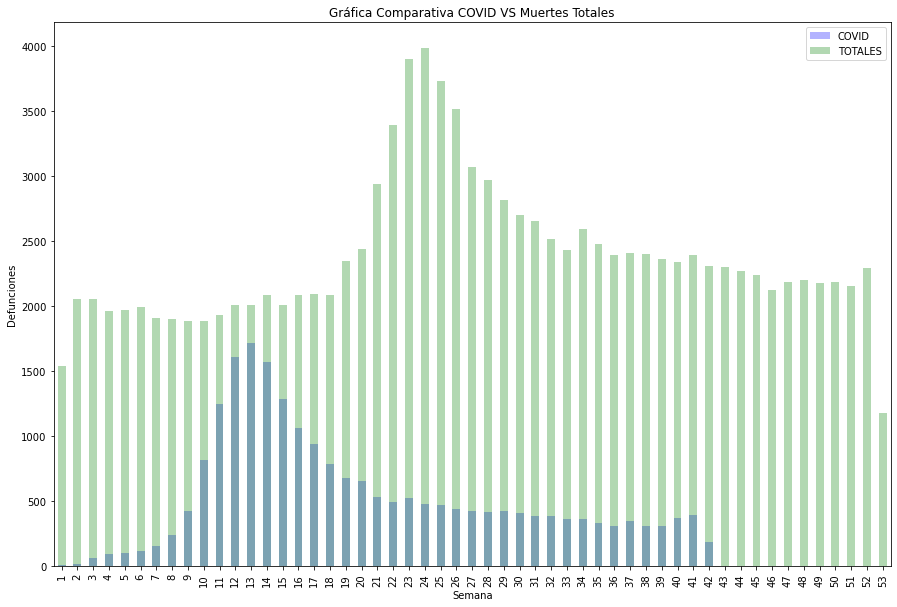

In [51]:
fig, ax = plt.subplots(figsize = (15,10))
covid.plot.bar( y = 'Fallecidos', ax = ax, color = 'b', alpha = .3, label = 'COVID')
totales.plot.bar ( y = 'Fallecidos', ax = ax, color = 'g', alpha = .3, label = 'TOTALES')
plt.ylabel('Defunciones')
plt.title('Gráfica Comparativa COVID VS Muertes Totales')

**GRÁFICA COMPARATIVA COVID VS GRIPE**

Text(0.5, 1.0, 'Gráfica Comparativa COVID VS GRIPE')

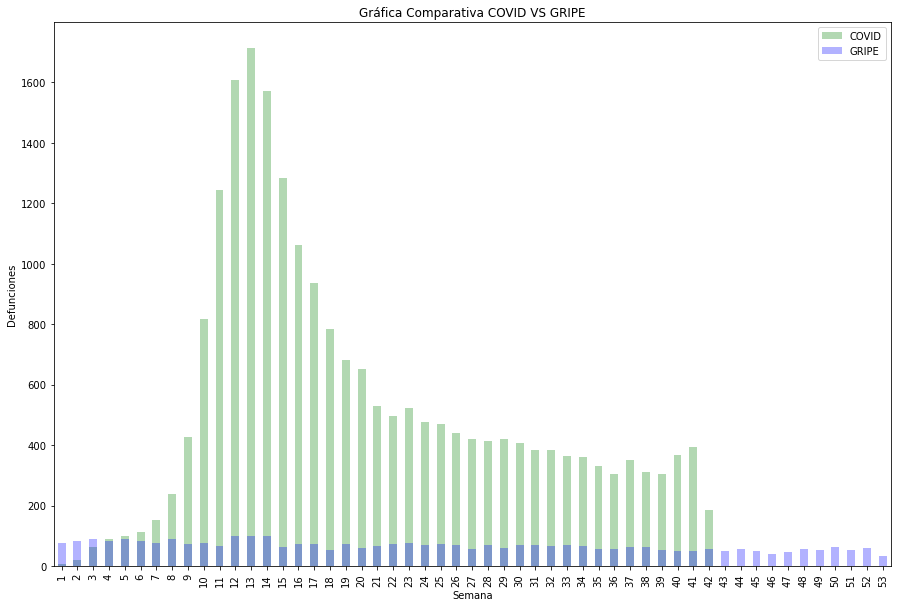

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
covid.plot.bar( y = 'Fallecidos', ax = ax, color = 'g', alpha = .3, label = 'COVID')
gripe.plot.bar ( y = 'Fallecidos', ax = ax, color = 'b', alpha = .3, label = 'GRIPE')
plt.ylabel('Defunciones')
plt.title('Gráfica Comparativa COVID VS GRIPE')